<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/Seance2_Manipulation_donnees_spatiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Séance 2 / Manipulation et représentation de données spatiales avec GeoPandas** 🌐
GeoPandas est une librairie open source pour faciliter le travail avec des données géospatiales en python. GeoPandas étend les types de données utilisés par les pandas pour permettre des opérations spatiales sur des types géométriques. Les opérations géométriques sont effectuées par shapely. Geopandas dépend en outre de fiona pour l'accès aux fichiers et de matplotlib pour le traçage.

https://geopandas.org/en/stable/index.html



#Configuration de l'environnement de travail 🧰

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
! pip install geopandas
# Instal MatplotLib
! pip install matplotlib
# Instal contextily
!pip install contextily
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
# Pour la cartographie thématique
!pip install mapclassify
# Pour la cartographie interactive
!pip install folium
# Pour l'affichage d'une échelle cartographique
!pip install matplotlib_scalebar

In [ ]:
#Importation des librairies nécessaires

import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import seaborn # Visualisation de données avancée
import geopandas as gpd #Gestion données spatiales
import contextily as ctx #Fonds de carte
import numpy as np #Manipulation de tableaux
import shapely #Manipulation de géométrie
import folium #Cartographie interactive
import mapclassify #Cartographie thématique
from matplotlib_scalebar.scalebar import ScaleBar #Echelle cartographique

#Importer et préparer les données spatiales de la séance 📥

## Couche des IRIS

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris

!wget -O velib.geojson https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr
!wget -O IRIS.geojson https://data.iledefrance.fr/explore/dataset/iris/download/?format=geojson&refine.dep=75&timezone=Europe/Berlin&lang=fr

--2025-03-11 07:53:27--  https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson
Resolving opendata.paris.fr (opendata.paris.fr)... 18.200.140.238, 52.211.64.165
Connecting to opendata.paris.fr (opendata.paris.fr)|18.200.140.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘velib.geojson’

velib.geojson           [      <=>           ] 724.53K   602KB/s    in 1.2s    

2025-03-11 07:53:30 (602 KB/s) - ‘velib.geojson’ saved [741915]

/bin/bash: line 1: refine.dep=75: command not found
--2025-03-11 07:53:30--  https://data.iledefrance.fr/explore/dataset/iris/download/?format=geojson
Resolving data.iledefrance.fr (data.iledefrance.fr)... 109.232.232.161, 5.104.97.33
Connecting to data.iledefrance.fr (data.iledefrance.fr)|109.232.232.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘IRIS.geojson’

IRIS.geo

### Importer la couche IRIS

Documentation import données SIG : https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html

typ_iris  insee_com  code_iris                       nom_iris dep  \
0        A      95539  955390103            Nord de Saint-Brice  95   
1        A      91340  913400105                  Z.A. Ouest A6  91   
2        A      95491  954910105   Zone d'Activités Économiques  95   
3        A      91086  910860105  Zone d'Activités La Marinière  91   
4        A      91161  911610105              Zone Industrielle  91   

                         id  iris                 nom_com  \
0  IRIS____0000000955390103  0103  Saint-Brice-sous-Forêt   
1  IRIS____0000000913400105  0105                  Lisses   
2  IRIS____0000000954910105  0105     Le Plessis-Bouchard   
3  IRIS____0000000910860105  0105               Bondoufle   
4  IRIS____0000000911610105  0105          Chilly-Mazarin   

                                            geometry  
0  POLYGON ((2.34527 49.0057, 2.34583 49.00701, 2...  
1  POLYGON ((2.42209 48.61355, 2.42411 48.61357, ...  
2  POLYGON ((2.24279 49.00758, 2.24411 49.00692, ...  
3  POLYGON ((2.39248 48.61859, 2.39249 48.61848, ...  
4  POLYGON ((2.30155 48.71982, 2.30465 48.71939, ...

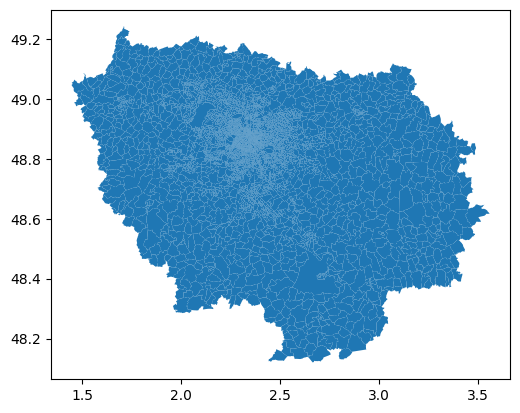

In [ ]:
#Importer le couche des IRIS
IRIS= gpd.read_file("IRIS.geojson", encoding='utf-8')
IRIS.plot()
IRIS.head(5)

In [ ]:
#Checker les types des champs de la couche IRIS
IRIS.dtypes

typ_iris       object
insee_com       int32
code_iris      object
nom_iris       object
dep            object
id             object
iris           object
nom_com        object
geometry     geometry
dtype: object

### Préparer la couche

<Axes: >

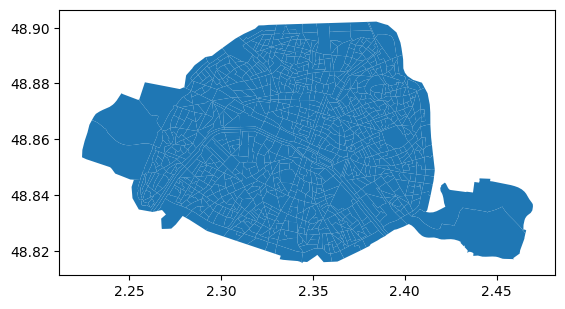

In [ ]:
#Garder uniquement les IRIS de Paris
IRISPARIS = IRIS[(IRIS["dep"] == "75")]
IRISPARIS.plot()

In [ ]:
#Garder que les colonnes utiles
IRISPARIS = IRISPARIS[["nom_iris", "insee_com", "code_iris", "geometry"]]
IRISPARIS.head(5)

nom_iris  insee_com  code_iris  \
6             Gaillon 2      75102  751020502   
7   Faubourg du Roule 5      75108  751083005   
8           Madeleine 8      75108  751083108   
9              Europe 9      75108  751083209   
10   Chaussée d'Antin 1      75109  751093401   

                                             geometry  
6   POLYGON ((2.33366 48.86751, 2.33028 48.86832, ...  
7   POLYGON ((2.30564 48.8749, 2.30594 48.87481, 2...  
8   POLYGON ((2.32667 48.87554, 2.32694 48.87418, ...  
9   POLYGON ((2.31944 48.87453, 2.31229 48.87332, ...  
10  POLYGON ((2.33712 48.87149, 2.337 48.87147, 2....

In [ ]:
#Changer le type d'une colonne
IRISPARIS['insee_com'] = IRISPARIS['insee_com'].astype(str)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Renommer les noms des champs
IRISPARIS.rename(columns={'nom_iris': 'iris_nom', 'code_iris': 'iris_code','insee_com': 'code_insee'}, inplace=True)
IRISPARIS.head()

<ipython-input-9-dc79d94f430f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IRISPARIS.rename(columns={'nom_iris': 'iris_nom', 'code_iris': 'iris_code','insee_com': 'code_insee'}, inplace=True)


iris_nom code_insee  iris_code  \
6             Gaillon 2      75102  751020502   
7   Faubourg du Roule 5      75108  751083005   
8           Madeleine 8      75108  751083108   
9              Europe 9      75108  751083209   
10   Chaussée d'Antin 1      75109  751093401   

                                             geometry  
6   POLYGON ((2.33366 48.86751, 2.33028 48.86832, ...  
7   POLYGON ((2.30564 48.8749, 2.30594 48.87481, 2...  
8   POLYGON ((2.32667 48.87554, 2.32694 48.87418, ...  
9   POLYGON ((2.31944 48.87453, 2.31229 48.87332, ...  
10  POLYGON ((2.33712 48.87149, 2.337 48.87147, 2....

In [ ]:
# Concaténer des champs
IRISPARIS["concat"] = IRISPARIS["code_insee"] + " - " + IRISPARIS["iris_nom"]
IRISPARIS.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


iris_nom code_insee  iris_code  \
6             Gaillon 2      75102  751020502   
7   Faubourg du Roule 5      75108  751083005   
8           Madeleine 8      75108  751083108   
9              Europe 9      75108  751083209   
10   Chaussée d'Antin 1      75109  751093401   

                                             geometry  \
6   POLYGON ((2.33366 48.86751, 2.33028 48.86832, ...   
7   POLYGON ((2.30564 48.8749, 2.30594 48.87481, 2...   
8   POLYGON ((2.32667 48.87554, 2.32694 48.87418, ...   
9   POLYGON ((2.31944 48.87453, 2.31229 48.87332, ...   
10  POLYGON ((2.33712 48.87149, 2.337 48.87147, 2....   

                         concat  
6             75102 - Gaillon 2  
7   75108 - Faubourg du Roule 5  
8           75108 - Madeleine 8  
9              75108 - Europe 9  
10   75109 - Chaussée d'Antin 1

In [ ]:
#Créer une colonne avec le numéro de l'arrondissement (SUBSTR)
IRISPARIS['ardt'] = IRISPARIS['code_insee'].str[-2:]
IRISPARIS.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


iris_nom code_insee  iris_code  \
6             Gaillon 2      75102  751020502   
7   Faubourg du Roule 5      75108  751083005   
8           Madeleine 8      75108  751083108   
9              Europe 9      75108  751083209   
10   Chaussée d'Antin 1      75109  751093401   

                                             geometry  \
6   POLYGON ((2.33366 48.86751, 2.33028 48.86832, ...   
7   POLYGON ((2.30564 48.8749, 2.30594 48.87481, 2...   
8   POLYGON ((2.32667 48.87554, 2.32694 48.87418, ...   
9   POLYGON ((2.31944 48.87453, 2.31229 48.87332, ...   
10  POLYGON ((2.33712 48.87149, 2.337 48.87147, 2....   

                         concat ardt  
6             75102 - Gaillon 2   02  
7   75108 - Faubourg du Roule 5   08  
8           75108 - Madeleine 8   08  
9              75108 - Europe 9   08  
10   75109 - Chaussée d'Antin 1   09

<ipython-input-12-61f9ecc6efa4>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  IRISPARIScentro.geometry = IRISPARIScentro['geometry'].centroid


iris_nom code_insee  iris_code                  geometry  \
6             Gaillon 2      75102  751020502   POINT (2.3312 48.86922)   
7   Faubourg du Roule 5      75108  751083005  POINT (2.30192 48.87339)   
8           Madeleine 8      75108  751083108  POINT (2.32443 48.87471)   
9              Europe 9      75108  751083209  POINT (2.31432 48.87452)   
10   Chaussée d'Antin 1      75109  751093401  POINT (2.33527 48.87198)   

                         concat ardt  
6             75102 - Gaillon 2   02  
7   75108 - Faubourg du Roule 5   08  
8           75108 - Madeleine 8   08  
9              75108 - Europe 9   08  
10   75109 - Chaussée d'Antin 1   09

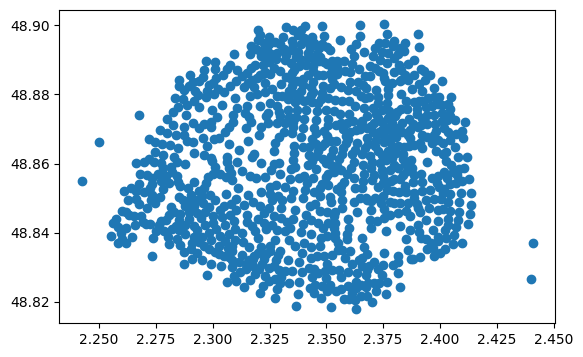

In [ ]:
#Passer les polygones en centroides (création d'une nouvelle une couche)

IRISPARIScentro = IRISPARIS.copy()
IRISPARIScentro.geometry = IRISPARIScentro['geometry'].centroid
IRISPARIScentro.plot()
IRISPARIScentro.head(5)

<Axes: >

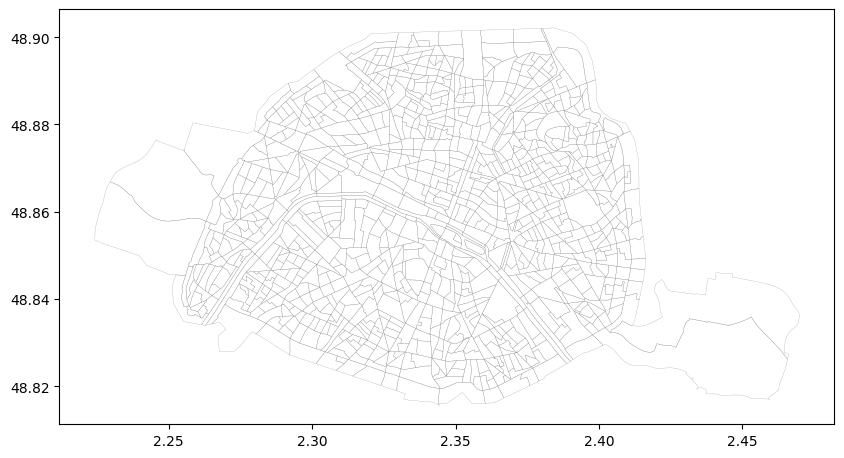

In [ ]:
#Cartographier les IRIS en mode contours

IRISPARIS.boundary.plot(figsize=(10,10), linewidth=0.15, color = 'grey')

<Axes: >

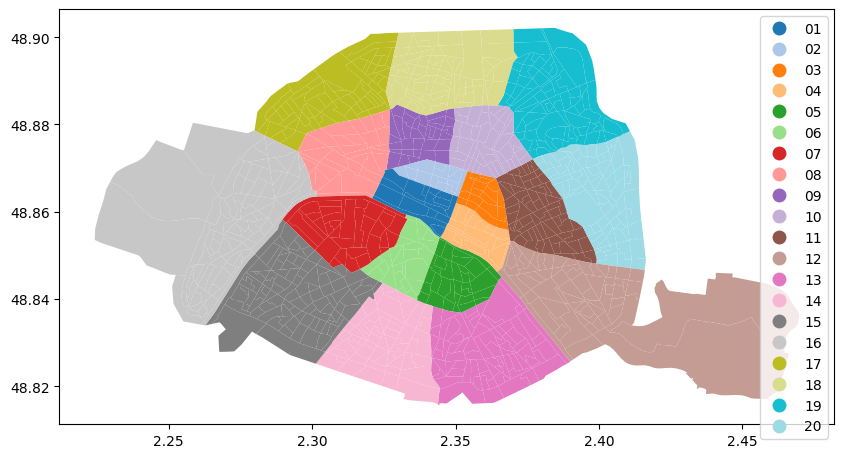

In [ ]:
#Cartographier les IRIS en fonction de l'arrondissement

IRISPARIS.plot(column = "ardt", linewidth=0.5, figsize=(10,10), cmap='tab20', legend=True)

In [ ]:
# Faire une carte interactive avec la biliothèque Folium (https://python-visualization.github.io/folium/)

map = folium.Map(
    width='80%',height='50%',
    location=[48.863170000122665, 2.342566412818605],
    zoom_start=12,
    tiles="cartodbpositron")

IRIS = folium.GeoJson(IRISPARIS).add_to(map)

folium.GeoJsonTooltip(['nom_iris', 'ardt']).add_to(IRIS)

map

# Exporter cette carte en HTML

map.save(outfile= "folium.html")

## La couche Vélibs

name stationcode  ebike  mechanical  \
0     Rouget de L'isle - Watteau       44015     11           2   
1  Benjamin Godard - Victor Hugo       16107      0           8   
2                  Saint-Sulpice        6003      0           3   
3                 Hôpital Mondor       40001      6           9   
4               Lacépède - Monge        5110      1           0   

                    duedate  numbikesavailable  numdocksavailable  capacity  \
0 2025-03-11 06:52:54+00:00                 13                  7         0   
1 2025-03-11 06:54:42+00:00                  8                 25         0   
2 2025-03-11 06:52:46+00:00                  3                 17         0   
3 2025-03-11 06:54:01+00:00                 15                 13         0   
4 2025-03-11 06:52:05+00:00                  1                 22         0   

  is_renting is_installed nom_arrondissement_communes is_returning  \
0        OUI          OUI             Vitry-sur-Seine          OUI   
1        OUI          OUI                       Paris          OUI   
2        OUI          OUI                       Paris          OUI   
3        OUI          OUI                     Créteil          OUI   
4        OUI          OUI                       Paris          OUI   

  code_insee_commune                  geometry  
0              94081   POINT (2.3963 48.77819)  
1              75056  POINT (2.27572 48.86598)  
2              75056  POINT (2.33081 48.85165)  
3              94028  POINT (2.45375 48.79892)  
4              75056  POINT (2.35197 48.84389)

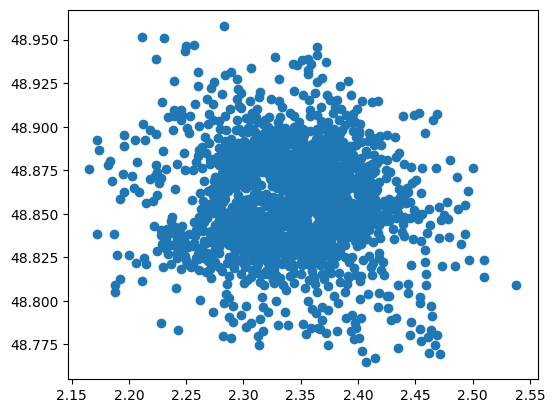

In [ ]:
#Importer la couche des velibs

Velib= gpd.read_file("velib.geojson", encoding='utf-8')
Velib.plot()
Velib.head()

<Axes: >

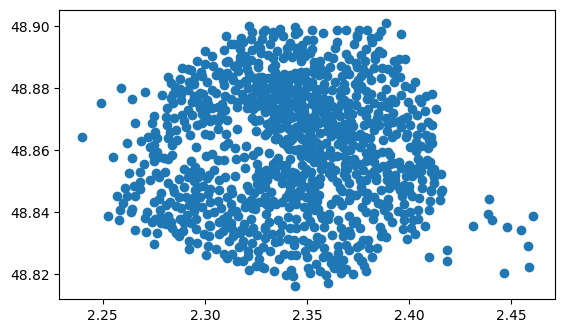

In [ ]:
#Ne garder que les stations de Velibs de la ville de Paris (sélection par attribut)

VelibParis = Velib[(Velib["nom_arrondissement_communes"] == 'Paris')]
VelibParis.plot()

In [ ]:
# Afficher le nombre de stations vélib dans le jeux de données
len(VelibParis)

981

In [ ]:
# Afficher le nombre de stations vélib dans le jeux de données
print(str(len(VelibParis)) + " stations vélibs")


981 stations vélibs


### Modifier la structure de la table

In [ ]:
# Ne garder que les champs intéressants et les renommer

VelibParis = VelibParis[["name", "stationcode", "ebike", "mechanical", "numbikesavailable", "numdocksavailable", "capacity",  "geometry"]]
VelibParis = VelibParis.rename(columns={'name': 'Nom', 'stationcode':'Code', 'ebike': 'Veloselectriques', 'ebike': 'Veloselectriques', 'mechanical': 'Velosmecaniques', 'numbikesavailable': 'Velosdispo', 'numdocksavailable': 'Soclesdispo', 'capacity': 'Capacite'})
VelibParis.head()

Nom   Code  Veloselectriques  Velosmecaniques  \
1  Benjamin Godard - Victor Hugo  16107                 0                8   
2                  Saint-Sulpice   6003                 0                3   
4               Lacépède - Monge   5110                 1                0   
5             Toudouze - Clauzel   9020                 3                0   
7    Cassini - Denfert-Rochereau  14111                 6                1   

   Velosdispo  Soclesdispo  Capacite                  geometry  
1           8           25         0  POINT (2.27572 48.86598)  
2           3           17         0  POINT (2.33081 48.85165)  
4           1           22         0  POINT (2.35197 48.84389)  
5           3           17         0   POINT (2.33736 48.8793)  
7           7           17         0  POINT (2.33604 48.83753)

In [ ]:
#Créer une colonne latitude et longitude
VelibParis['latitude'] = VelibParis.geometry.y
VelibParis['longitude'] = VelibParis.geometry.x
VelibParis.head()

Nom   Code  Veloselectriques  Velosmecaniques  \
1  Benjamin Godard - Victor Hugo  16107                 0                8   
2                  Saint-Sulpice   6003                 0                3   
4               Lacépède - Monge   5110                 1                0   
5             Toudouze - Clauzel   9020                 3                0   
7    Cassini - Denfert-Rochereau  14111                 6                1   

   Velosdispo  Soclesdispo  Capacite                  geometry   latitude  \
1           8           25         0  POINT (2.27572 48.86598)  48.865983   
2           3           17         0  POINT (2.33081 48.85165)  48.851654   
4           1           22         0  POINT (2.35197 48.84389)  48.843893   
5           3           17         0   POINT (2.33736 48.8793)  48.879296   
7           7           17         0  POINT (2.33604 48.83753)  48.837526   

   longitude  
1   2.275725  
2   2.330808  
4   2.351966  
5   2.337360  
7   2.336035

In [ ]:
#Calculer une colonne
VelibParis['Capacite'] = VelibParis['Velosdispo'] + VelibParis['Soclesdispo']
VelibParis.head()

Nom   Code  Veloselectriques  Velosmecaniques  \
1  Benjamin Godard - Victor Hugo  16107                 0                8   
2                  Saint-Sulpice   6003                 0                3   
4               Lacépède - Monge   5110                 1                0   
5             Toudouze - Clauzel   9020                 3                0   
7    Cassini - Denfert-Rochereau  14111                 6                1   

   Velosdispo  Soclesdispo  Capacite                  geometry   latitude  \
1           8           25        33  POINT (2.27572 48.86598)  48.865983   
2           3           17        20  POINT (2.33081 48.85165)  48.851654   
4           1           22        23  POINT (2.35197 48.84389)  48.843893   
5           3           17        20   POINT (2.33736 48.8793)  48.879296   
7           7           17        24  POINT (2.33604 48.83753)  48.837526   

   longitude  
1   2.275725  
2   2.330808  
4   2.351966  
5   2.337360  
7   2.336035

In [ ]:
#Calculer la proportion de vélos electrique par station



### Filtrer les données

In [ ]:
# Selectioner selon une valeur numérique
GrandesStations = VelibParis[(VelibParis["Capacite"] >50)]
print(str(len(GrandesStations)) + " stations vélibs")

91 stations vélibs


*   Sélectionner selon deux modalité d'une variable (OR)
```
Squaresetjardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin') | (EspacesvertsOk["categorie"] == 'Square')]
```

*   Sélectionner selon les modalités de deux variables (AND)
```
Squares15eme = EspacesvertsOk[(EspacesvertsOk["Arrondissement"] == 75015) & (EspacesvertsOk["categorie"] == 'Square')]
```

*   Sélectioner toute les modalités sauf une
```
Toussaufjardins = EspacesvertsOk[~(EspacesvertsOk["categorie"] == 'Jardin')]
```


###La couche des arrondissements (à importer via un fichier en local)

https://opendata.paris.fr/explore/dataset/arrondissements/export/?disjunctive.c_ar&disjunctive.c_arinsee&disjunctive.l_ar

In [ ]:
#Importer le jeu de données dans l'espace de travail puis le convertir en gdf

Ardt= gpd.read_file("arrondissements.geojson", encoding='utf-8')
Ardt.plot()
Ardt.head()

# Ecrire un jeu de données spatiales 💾

Documentation export données spatiales : https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html

In [ ]:
#Ecrire un geojson

VelibParis.to_file("Velibs.geojson", driver="GeoJSON")

In [ ]:
#Ecrire un gpk

IRISPARIS.to_file("Paris.gpkg", layer='IRIS', driver="GPKG")
VelibParis.to_file("Paris.gpkg", layer='VelibParis', driver="GPKG")
Ardt.to_file("Paris.gpkg", layer='Ardt', driver="GPKG")

# Calculer des statistique basiques (descriptives) 🔎

In [ ]:
#Calculer des statistiques basiques pour tous les champs de la couche des vélibs

VelibParis.describe()

Veloselectriques  Velosmecaniques  Velosdispo  Soclesdispo    Capacite  \
count        981.000000       981.000000  981.000000   981.000000  981.000000   
mean           4.391437         8.040775   12.432212    19.162080   31.594292   
std            4.585435        10.617773   12.875413    13.192501   12.912995   
min            0.000000         0.000000    0.000000     0.000000    0.000000   
25%            1.000000         1.000000    3.000000     8.000000   22.000000   
50%            3.000000         3.000000    8.000000    19.000000   30.000000   
75%            6.000000        12.000000   19.000000    28.000000   39.000000   
max           29.000000        58.000000   71.000000    64.000000   74.000000   

         latitude   longitude  ProportionVelosElectriques  
count  981.000000  981.000000                  912.000000  
mean    48.860037    2.343471                    0.500477  
std      0.020189    0.038911                    0.328455  
min     48.816219    2.239905                    0.000000  
25%     48.843828    2.315879                    0.232692  
50%     48.860680    2.344586                    0.465476  
75%     48.876201    2.371211                    0.750000  
max     48.900990    2.460549                    1.000000

In [ ]:
# Calculer le nombre de stations de vélibs

VelibParis["Code"].size

981

In [ ]:
# Calculer la somme totale des capacités des stations

VelibParis["Capacite"].sum()

30994

In [ ]:
# Calculer la moyenne des capacités par station

VelibParis["Capacite"].mean()

31.594291539245667

In [ ]:
#Calculer le nombre total de vélibs, le nombre total vélibs électrique et le nombre total de vélibs mécaniques
A=VelibParis['Velosdispo'].sum()
B=VelibParis['Velosmecaniques'].sum()
C=VelibParis['Veloselectriques'].sum()

print(A, 'vélos disponibles  / ', B, 'vélos mécaniques  / ', C, 'vélos électriques')

9314 vélos disponibles  /  6585 vélos mécaniques  /  2729 vélos électriques


In [ ]:
# Créer une fonction pour sortir un indicateur formaté et compréhensible

Txveloelec = (VelibParis['Veloselectriques'].sum())/ (VelibParis['Velosdispo'].sum()) *100
Txveloelec = round(Txveloelec,1)
print ("Taux de vélos électriques " + str(Txveloelec) + "%")

Taux de vélos électriques 29.3%


# Graphiques exploratoires 📊

Text(0.5, 0, 'Nombre de socles')

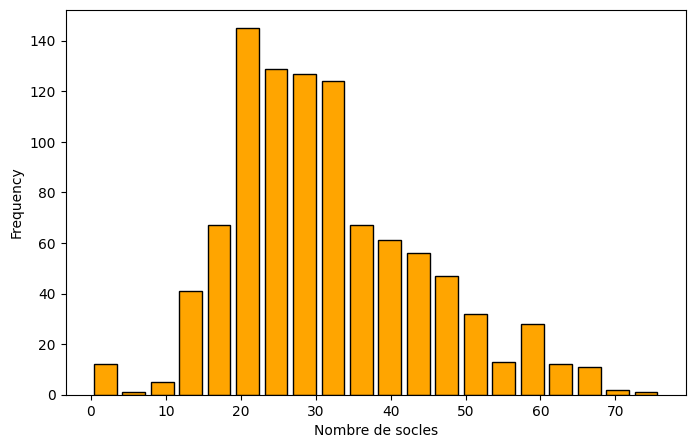

In [ ]:
# Histogramme de distribution des capacités des stations
ax = VelibParis.plot.hist(y='Capacite', figsize=(8, 5), bins=20, rwidth=0.8, edgecolor='black', color='orange',legend=False)
ax.set_xlabel('Nombre de socles')

<Axes: xlabel='Capacite', ylabel='Veloselectriques'>

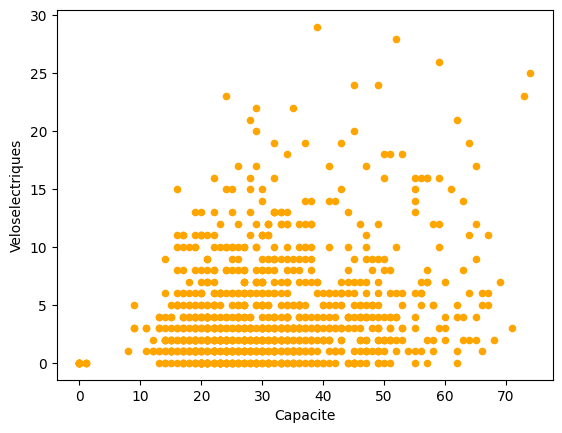

In [ ]:
# Scatterplot

VelibParis.plot.scatter('Capacite', 'Veloselectriques', color= 'orange' )

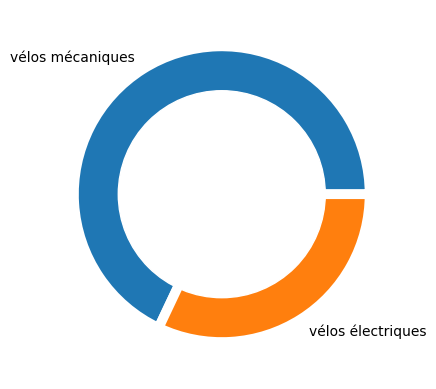

In [ ]:
names = ['vélos mécaniques', 'vélos électriques']
size = [7787 ,3669]

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

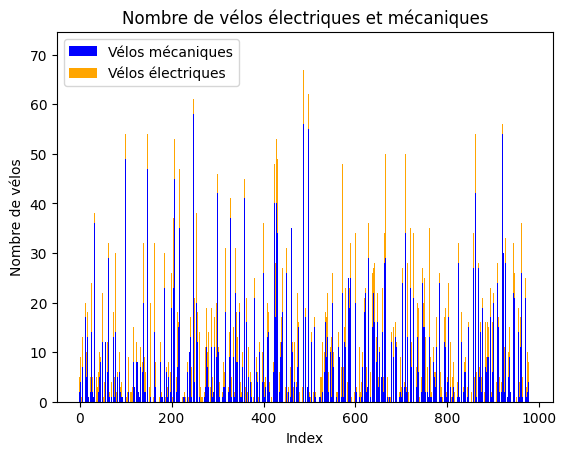

In [ ]:
# Supposons que tes colonnes sont bien définies dans VelibParis
velos_mecaniques = VelibParis['Velosmecaniques']
velos_electriques = VelibParis['Veloselectriques']

# Création d'un index numérique pour les barres
index = range(len(VelibParis))

# Création du graphique en barres empilées
plt.bar(index, velos_mecaniques, label='Vélos mécaniques', color='blue')
plt.bar(index, velos_electriques, bottom=velos_mecaniques, label='Vélos électriques', color='orange')

# Ajout des labels et du titre
plt.xlabel('Index')
plt.ylabel('Nombre de vélos')
plt.title('Nombre de vélos électriques et mécaniques')
plt.legend()

# Affichage du graphique
plt.show()

# Calculer de nouvelles colonnes 📚

In [ ]:
# Ajouter une colonne avec le tx de disponibilité de chaque stations

VelibParis["Txdispo"] = VelibParis["Soclesdispo"] / VelibParis["Capacite"] *100
VelibParis.head()

Nom   Code  Veloselectriques  Velosmecaniques  \
1  Benjamin Godard - Victor Hugo  16107                 0                8   
2                  Saint-Sulpice   6003                 0                3   
4               Lacépède - Monge   5110                 1                0   
5             Toudouze - Clauzel   9020                 3                0   
7    Cassini - Denfert-Rochereau  14111                 6                1   

   Velosdispo  Soclesdispo  Capacite                  geometry   latitude  \
1           8           25        33  POINT (2.27572 48.86598)  48.865983   
2           3           17        20  POINT (2.33081 48.85165)  48.851654   
4           1           22        23  POINT (2.35197 48.84389)  48.843893   
5           3           17        20   POINT (2.33736 48.8793)  48.879296   
7           7           17        24  POINT (2.33604 48.83753)  48.837526   

   longitude    Txdispo  
1   2.275725  75.757576  
2   2.330808  85.000000  
4   2.351966  95.652174  
5   2.337360  85.000000  
7   2.336035  70.833333

In [ ]:
# Ajouter une colonne avec le tx d'occupation de chaque stations

VelibParis["Txoccupation"] = 100 - VelibParis["Txdispo"]
VelibParis.head()

Nom   Code  Veloselectriques  Velosmecaniques  \
1  Benjamin Godard - Victor Hugo  16107                 0                8   
2                  Saint-Sulpice   6003                 0                3   
4               Lacépède - Monge   5110                 1                0   
5             Toudouze - Clauzel   9020                 3                0   
7    Cassini - Denfert-Rochereau  14111                 6                1   

   Velosdispo  Soclesdispo  Capacite                  geometry   latitude  \
1           8           25        33  POINT (2.27572 48.86598)  48.865983   
2           3           17        20  POINT (2.33081 48.85165)  48.851654   
4           1           22        23  POINT (2.35197 48.84389)  48.843893   
5           3           17        20   POINT (2.33736 48.8793)  48.879296   
7           7           17        24  POINT (2.33604 48.83753)  48.837526   

   longitude    Txdispo  Txoccupation  
1   2.275725  75.757576     24.242424  
2   2.330808  85.000000     15.000000  
4   2.351966  95.652174      4.347826  
5   2.337360  85.000000     15.000000  
7   2.336035  70.833333     29.166667

In [ ]:
# Définir le type de station (emetrice ou réceptrice)

VelibParis.loc[VelibParis['Velosdispo'] <VelibParis['Soclesdispo'], 'Type'] = 'Emetrice'
VelibParis.loc[VelibParis['Velosdispo'] >=VelibParis['Soclesdispo'], 'Type'] = 'Receptrice'
VelibParis.head()

Nom   Code  Veloselectriques  Velosmecaniques  \
1  Benjamin Godard - Victor Hugo  16107                 0                8   
2                  Saint-Sulpice   6003                 0                3   
4               Lacépède - Monge   5110                 1                0   
5             Toudouze - Clauzel   9020                 3                0   
7    Cassini - Denfert-Rochereau  14111                 6                1   

   Velosdispo  Soclesdispo  Capacite                  geometry   latitude  \
1           8           25        33  POINT (2.27572 48.86598)  48.865983   
2           3           17        20  POINT (2.33081 48.85165)  48.851654   
4           1           22        23  POINT (2.35197 48.84389)  48.843893   
5           3           17        20   POINT (2.33736 48.8793)  48.879296   
7           7           17        24  POINT (2.33604 48.83753)  48.837526   

   longitude    Txdispo  Txoccupation      Type  
1   2.275725  75.757576     24.242424  Emetrice  
2   2.330808  85.000000     15.000000  Emetrice  
4   2.351966  95.652174      4.347826  Emetrice  
5   2.337360  85.000000     15.000000  Emetrice  
7   2.336035  70.833333     29.166667  Emetrice

# Cartographie thématique 🗺

* Couleurs de ColorBrewer > https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/ggplot2/figures/101-rcolorbrewer-palette-rcolorbrewer-palettes-1.png

* Inverser palette de couleur : _r

* Documentation carto thématique : https://geopandas.org/en/stable/gallery/choropleths.html

## Cartographies de base

<Axes: >

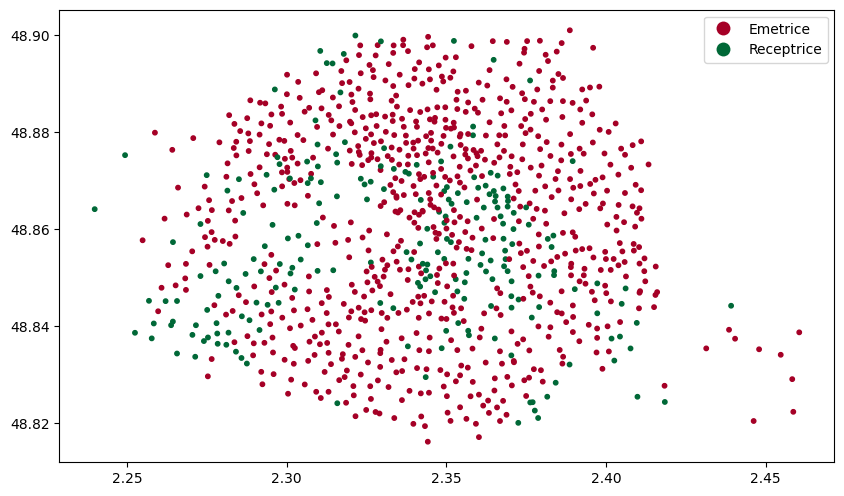

In [ ]:
#Cartographier le type de station (catégorisation)

VelibParis.plot(figsize=(10,10), alpha=1, column="Type", cmap='RdYlGn', categorical=True, markersize=10, legend=True)

<Axes: >

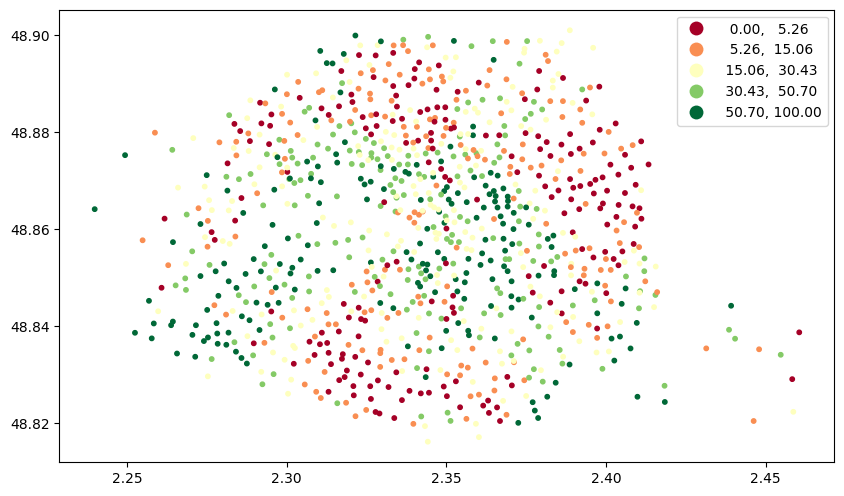

In [ ]:
#Cartographier le taux d'occupation par station (graduation de couleurs)

VelibParis.plot(figsize=(10,10), alpha=1, column="Txoccupation", cmap='RdYlGn',scheme='quantiles', markersize=10, categorical=False, legend=True)

<Axes: >

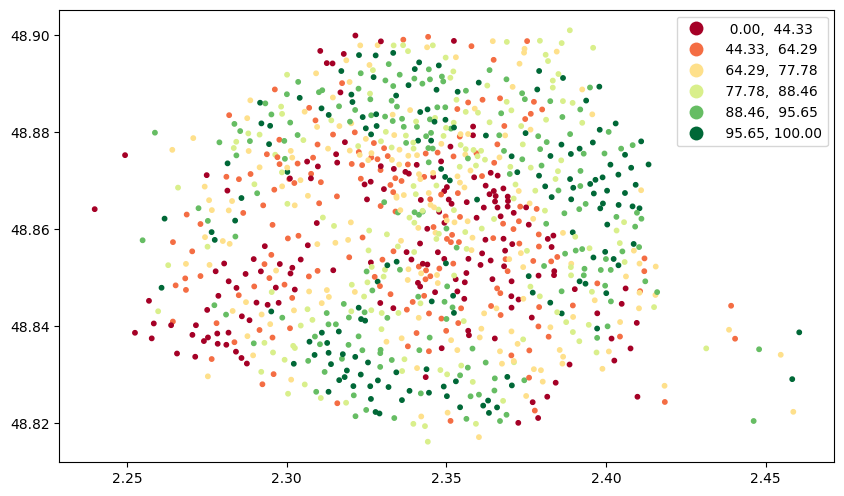

In [ ]:
#Cartographier le taux de disponibilité par station (graduation de couleurs)

VelibParis.plot(figsize=(10,10), alpha=1, column="Txdispo", cmap='RdYlGn',scheme='quantiles', k = 6, markersize=10, categorical=False, legend=True)

<Axes: >

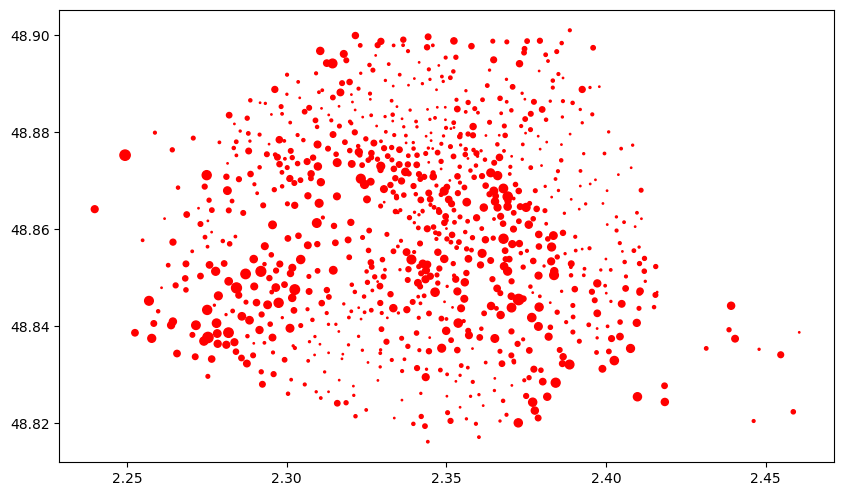

In [ ]:
#Cartographier le nombre de vélibs disponibles par station (variation de tailles)

VelibParis.plot(figsize=(10,10), markersize="Velosdispo",alpha=1, color = 'red', categorical=False, legend=True)

<Axes: >

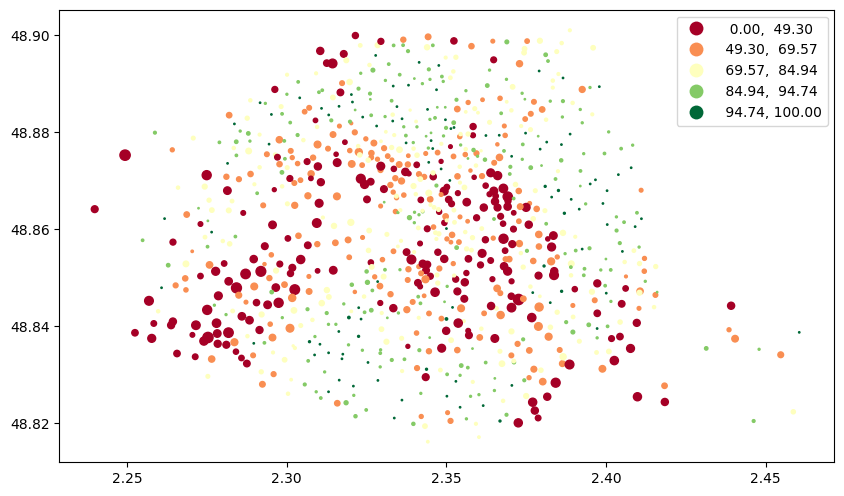

In [ ]:
#Cartographier le nombre de vélibs disponibles et le taux d'occupation par station (variation de tailles et de couleurs)

VelibParis.plot(figsize=(10,10), markersize="Velosdispo",alpha=1, column="Txdispo", cmap='RdYlGn',scheme='quantiles', categorical=False, legend=True)

## Habiller ses cartes (fond de carte, titre, échelles...)
https://contextily.readthedocs.io/en/latest/intro_guide.html

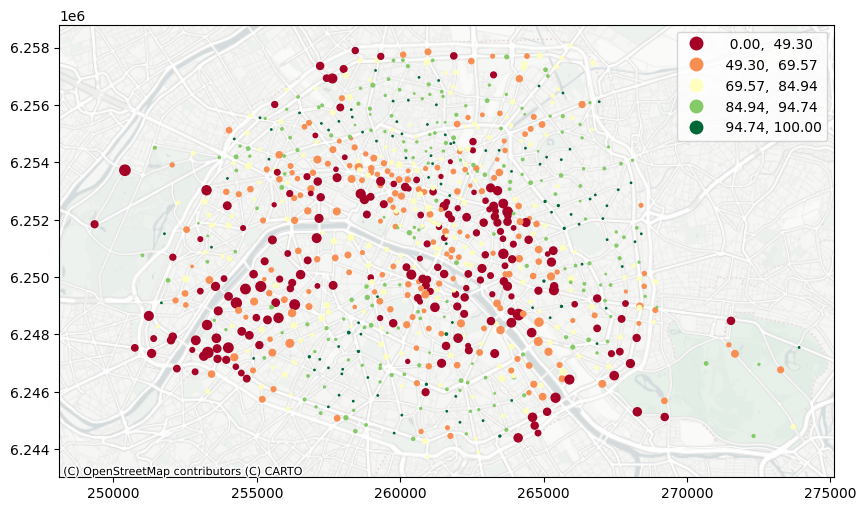

In [ ]:
#Cartographier le nombre de vélibs disponibles et le taux d'occupation par station avec un fond de carte CartoDB

ax = VelibParis.to_crs('EPSG:3857').plot(figsize=(10,10),markersize="Velosdispo",alpha=1, column="Txdispo", cmap='RdYlGn',scheme='quantiles', categorical=False, legend=True)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

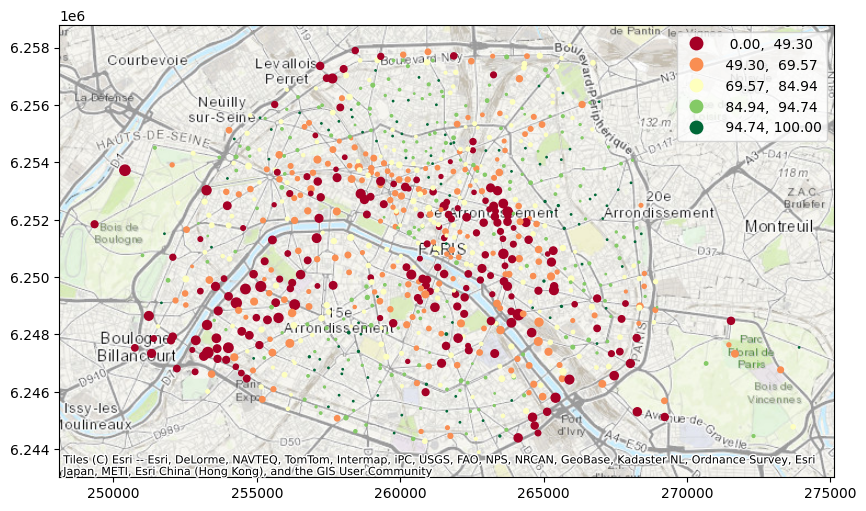

In [ ]:
#Cartographier le nombre de vélibs disponibles et le taux d'occupation par station avec un fond de carte Esri

ax = VelibParis.to_crs('EPSG:3857').plot(figsize=(10,10),markersize="Velosdispo",alpha=1, column="Txdispo", cmap='RdYlGn',scheme='quantiles', categorical=False, legend=True)

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldTopoMap)

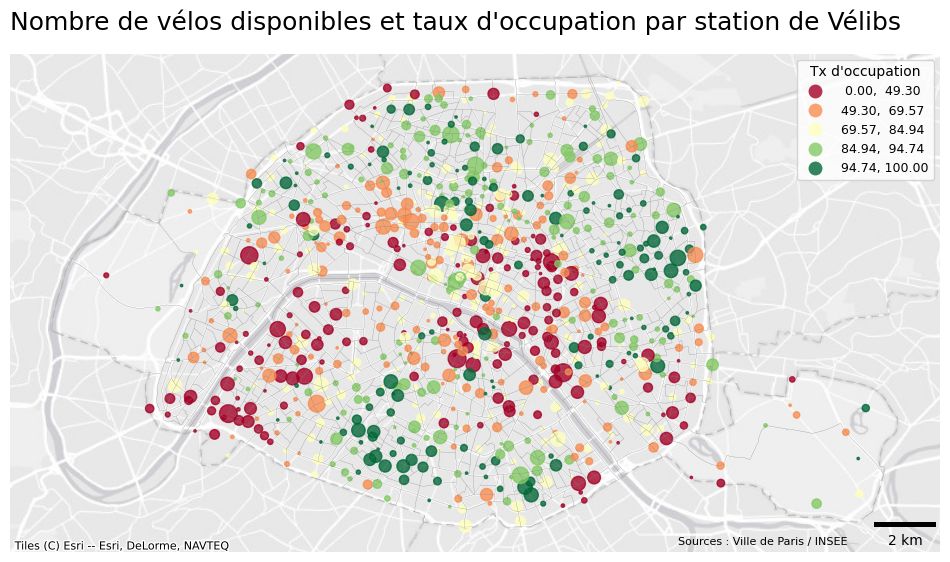

In [ ]:
#Faire une carte avec deux couches mise en forme

Carte1, ax = plt.subplots(figsize=(12,12))  # Configuration de la carte

IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'grey') # Configuration couche arrondissements
VelibParis.to_crs('EPSG:3857').plot(ax=ax, markersize=VelibParis['Velosdispo']*3,column="Txdispo", cmap='RdYlGn',scheme='quantiles', alpha=0.8,
                                    categorical=False,legend=True,
                                    legend_kwds={'title': "Tx d'occupation", 'loc': 'upper right', 'title_fontsize':10, 'fontsize':9}) # Configuration couche des vélibs

ctx.add_basemap(ax,source=ctx.providers.Esri.WorldGrayCanvas) # Configuration du fond de carte

# On enlève les axes
ax.axis("off")

# Ajout du titre de la carte
plt.title("Nombre de vélos disponibles et taux d'occupation par station de Vélibs", loc='left', fontsize=18)

#Ajout d'une échelle
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="black"))

# Ajout des sources
ax.text(0.90, 0.01, 'Sources : Ville de Paris / INSEE', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=8)

plt.show() #Génération de la carte

In [ ]:
#Faire une carte finalisée avec trois couches (Vélibs, IRIS et Arrondissements)




In [ ]:
# Enreigistrer une carte en image

Carte1.savefig("Carte1.png")

## Exercices sur la couche Mobilib'

dataset : https://opendata.paris.fr/explore/dataset/liste-des-stations-de-services-de-vehicules

* Carte finalisée des stations avec le nombre d'emplacements (taille) et opérateur (couleur)
* Graphique du nombre de stations par opérateur

# Jointure attributaire, calcul d'indicateurs, cartographie thématique

In [ ]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O population.csv https://opendata.arcgis.com/datasets/b2936d51b66b4213ae9351657fa230ac_0.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D


In [ ]:
#Importer CSV to dataframe

population = pd.read_csv("population.csv", sep=',')
population.head(3)

OBJECTID    n_sq_ir  c_cainsee  n_qu       c_ir c_typeir  \
0         1  930003891      93048   0.0  930480801        H   
1         2  930003875      93048   0.0  930480803        H   
2         3  930003874      93048   0.0  930480901        H   

                        l_ir          m2_ip         m2_pop         m2_emp  \
0   Bel Air Grands Pêchers 1  115523.688783  106227.518051  114780.364397   
1   Bel Air Grands Pechers 3   88014.547679   80896.936435   81518.540816   
2  Ramenas Fabien Lagrange 1  158411.119470  138753.241185  149619.390800   

   ...  pct_evo_etranger   nb_immigre  pct_immigre  nb_immigre_n5  \
0  ...          0.291606  1060.159129    34.679246    1108.278961   
1  ...          3.577858   650.452747    31.879210     555.138345   
2  ...          6.790857   617.079310    31.591452     542.698413   

   pct_immigre_n5  pct_evo_immigre  n_sq_epci           l_epci  shape_Length  \
0       34.445992         0.233254        140  T8 Est Ensemble   1927.186327   
1       28.404448         3.474762        140  T8 Est Ensemble   1597.143066   
2       25.769168         5.822284        140  T8 Est Ensemble   2494.946453   

      shape_Area  
0  139705.062882  
1  106750.396820  
2  209582.967651  

[3 rows x 72 columns]

In [ ]:
# Ne garder que les colonne importantes

PopulationOK = population[["c_ir", "l_ir", "nb_pop"]]
PopulationOK.head()

c_ir                       l_ir       nb_pop
0  930480801   Bel Air Grands Pêchers 1  3057.042017
1  930480803   Bel Air Grands Pechers 3  2040.366599
2  930480901  Ramenas Fabien Lagrange 1  1953.311022
3  930480903  Ramenas Fabien Lagrange 3  2538.624479
4  930481002         Branly Boissiere 2  1750.317596

In [ ]:
#Renommer les colonnes

PopulationOK = PopulationOK.rename(columns={'c_ir': 'Code_IRIS', 'l_ir':'Libelle', 'nb_pop': 'Population'})
PopulationOK.head()

Code_IRIS                    Libelle   Population
0  930480801   Bel Air Grands Pêchers 1  3057.042017
1  930480803   Bel Air Grands Pechers 3  2040.366599
2  930480901  Ramenas Fabien Lagrange 1  1953.311022
3  930480903  Ramenas Fabien Lagrange 3  2538.624479
4  930481002         Branly Boissiere 2  1750.317596

In [ ]:
PopulationOK.dtypes

Code_IRIS       int64
Libelle        object
Population    float64
dtype: object

In [ ]:
#Changer le type d'une colonne
PopulationOK['Code_IRIS'] = PopulationOK['Code_IRIS'].astype(str)

In [ ]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(PopulationOK, left_on='iris_code', right_on='Code_IRIS')
IRISPARIS.head()

iris_nom code_insee  iris_code  \
0            Gaillon 2      75102  751020502   
1  Faubourg du Roule 5      75108  751083005   
2          Madeleine 8      75108  751083108   
3             Europe 9      75108  751083209   
4   Chaussée d'Antin 1      75109  751093401   

                                            geometry  \
0  POLYGON ((2.33366 48.86751, 2.33028 48.86832, ...   
1  POLYGON ((2.30564 48.8749, 2.30594 48.87481, 2...   
2  POLYGON ((2.32667 48.87554, 2.32694 48.87418, ...   
3  POLYGON ((2.31944 48.87453, 2.31229 48.87332, ...   
4  POLYGON ((2.33712 48.87149, 2.337 48.87147, 2....   

                        concat ardt  Code_IRIS              Libelle  \
0            75102 - Gaillon 2   02  751020502            Gaillon 2   
1  75108 - Faubourg du Roule 5   08  751083005  Faubourg du Roule 5   
2          75108 - Madeleine 8   08  751083108          Madeleine 8   
3             75108 - Europe 9   08  751083209             Europe 9   
4   75109 - Chaussée d'Antin 1   09  751093401   Chaussee D'Antin 1   

    Population  
0   275.150423  
1  1378.912929  
2   536.993687  
3   948.341332  
4   108.089196

In [ ]:
# Reprojeter la couche IRIS pour le calcul de surface

IRIS2154 = IRISPARIS.to_crs(2154)
IRIS2154.crs

In [ ]:
# Ajouter une colonne Surface à la couche des IRIS

IRIS2154["surface"] = IRIS2154['geometry'].area/1000000
IRIS2154.head(10)

iris_nom code_insee  iris_code  \
0            Gaillon 2      75102  751020502   
1  Faubourg du Roule 5      75108  751083005   
2          Madeleine 8      75108  751083108   
3             Europe 9      75108  751083209   
4   Chaussée d'Antin 1      75109  751093401   
5   Chaussée d'Antin 7      75109  751093407   
6   Chaussée d'Antin 9      75109  751093409   
7     Quinze-Vingts 12      75112  751124812   
8     Saint-Lambert 33      75115  751155733   
9            Necker 19      75115  751155819   

                                            geometry  \
0  POLYGON ((651119 6863259.3, 650872.1 6863351.6...   
1  POLYGON ((649071 6864099, 649092.4 6864088.5, ...   
2  POLYGON ((650613.5 6864157.3, 650632.1 6864005...   
3  POLYGON ((650082.3 6864049.3, 649557.2 6863919...   
4  POLYGON ((651376.7 6863700.1, 651367.4 6863697...   
5  POLYGON ((651537.2 6864285.4, 651543.7 6864280...   
6  POLYGON ((650632.1 6864005.4, 650613.5 6864157...   
7  POLYGON ((653644.9 6860765.7, 653849.2 6860793...   
8  POLYGON ((649025.7 6859680.6, 649105.4 6859822...   
9  POLYGON ((650328.8 6860662.2, 650409.6 6860621...   

                        concat ardt  Code_IRIS              Libelle  \
0            75102 - Gaillon 2   02  751020502            Gaillon 2   
1  75108 - Faubourg du Roule 5   08  751083005  Faubourg du Roule 5   
2          75108 - Madeleine 8   08  751083108          Madeleine 8   
3             75108 - Europe 9   08  751083209             Europe 9   
4   75109 - Chaussée d'Antin 1   09  751093401   Chaussee D'Antin 1   
5   75109 - Chaussée d'Antin 7   09  751093407   Chaussee D'Antin 7   
6   75109 - Chaussée d'Antin 9   09  751093409   Chaussee D'Antin 9   
7     75112 - Quinze-Vingts 12   12  751124812     Quinze Vingts 12   
8     75115 - Saint-Lambert 33   15  751155733     Saint-Lambert 33   
9            75115 - Necker 19   15  751155819            Necker 19   

    Population   surface  
0   275.150423  0.074645  
1  1378.912929  0.166123  
2   536.993687  0.052733  
3   948.341332  0.114391  
4   108.089196  0.041681  
5  1317.661498  0.071261  
6   455.846627  0.060252  
7  1511.453910  0.110883  
8     0.000000  0.014530  
9     0.000000  0.034994

In [ ]:
#Calculer la densité de population des IRIS

IRIS2154["Densite"] = IRIS2154["Population"] / IRIS2154["surface"]
IRIS2154.head()

iris_nom code_insee  iris_code  \
0            Gaillon 2      75102  751020502   
1  Faubourg du Roule 5      75108  751083005   
2          Madeleine 8      75108  751083108   
3             Europe 9      75108  751083209   
4   Chaussée d'Antin 1      75109  751093401   

                                            geometry  \
0  POLYGON ((651119 6863259.3, 650872.1 6863351.6...   
1  POLYGON ((649071 6864099, 649092.4 6864088.5, ...   
2  POLYGON ((650613.5 6864157.3, 650632.1 6864005...   
3  POLYGON ((650082.3 6864049.3, 649557.2 6863919...   
4  POLYGON ((651376.7 6863700.1, 651367.4 6863697...   

                        concat ardt  Code_IRIS              Libelle  \
0            75102 - Gaillon 2   02  751020502            Gaillon 2   
1  75108 - Faubourg du Roule 5   08  751083005  Faubourg du Roule 5   
2          75108 - Madeleine 8   08  751083108          Madeleine 8   
3             75108 - Europe 9   08  751083209             Europe 9   
4   75109 - Chaussée d'Antin 1   09  751093401   Chaussee D'Antin 1   

    Population   surface       Densite  
0   275.150423  0.074645   3686.135747  
1  1378.912929  0.166123   8300.554978  
2   536.993687  0.052733  10183.334166  
3   948.341332  0.114391   8290.365112  
4   108.089196  0.041681   2593.233063

Text(0.5, 0, "Nombre d'habitants")

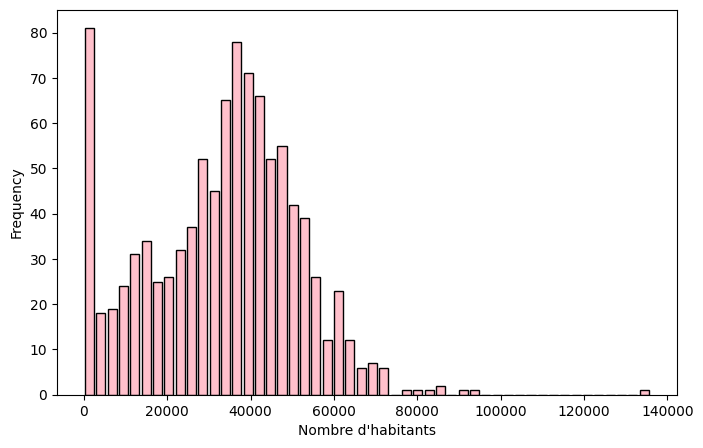

In [ ]:
# Histogramme de distribution des densités de population par IRIS

ax = IRIS2154.plot.hist(y='Densite', figsize=(8, 5), bins=50, rwidth=0.8, edgecolor='black', color='pink',legend=False)
ax.set_xlabel("Nombre d'habitants")

In [ ]:
# Faire une carte des densité de population par IRIS

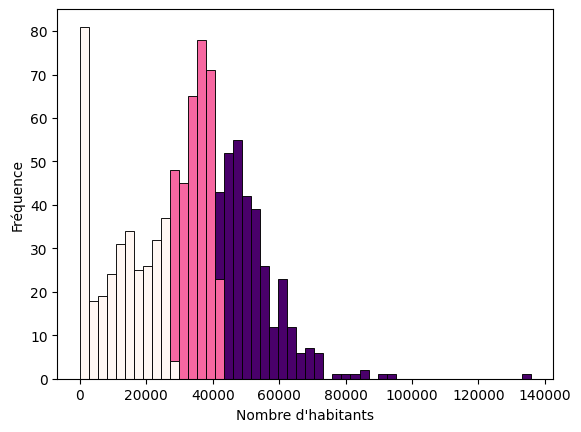

In [ ]:
# Histogramme en fonction de la discrétisation de la carte

import seaborn as sns

# Nombre de quantiles
num_quantiles = len(couleurs)-1

# Calculer les quantiles
quantiles = pd.qcut(IRIS2154['Densite'], num_quantiles, labels=False)

# Tracer l'histogramme avec des couleurs de quantiles en utilisant Seaborn
sns.histplot(data=IRIS2154, x='Densite', bins=50, hue=quantiles, palette='RdPu',  alpha=1, legend=False)

# Définir les étiquettes des axes
plt.xlabel("Nombre d'habitants")
plt.ylabel("Fréquence")

# Afficher le graphe
plt.show()

### Faire une carte avec le pourcentage d'immigrés par IRIS

`pct_immigre`

## Dissolve(With Stat)

In [ ]:
# Créer une couche des arrondissements en regroupant selon la variable nom_com

ARDT = IRISPARIS.dissolve(by='ardt')
ARDT.plot()
ARDT.head()

In [ ]:
# Créer une couche des arrondissements avec une agrégation statistiques (Population)

ARDT = IRIS2154.dissolve(by='insee_com', aggfunc='sum')
ARDT.head()


In [ ]:
# Vérifier la population dans les IRIS (niveau de départ) et dans les arrondissements (résultat de l'aggrégation spatiale)

A= IRISPARIS["Population"].sum()
B= ARDT["Population"].sum()

print ("Population IRIS = " + str(A) + "\nPopulation Arrondissements = " + str(B) ) # \n permet de sauter une ligne lors de l'impression d'une chaîne de caractères en Python


## Exercice avec les données de logement des IRIS

https://opendata.apur.org/datasets/recensement-iris-logement/data


* Produire une carte avec en cercle proportionnels le nombre de logement sociaux
* Produire une carte avec en aplat de couleur le taux de logement vacant



In [ ]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O logement.csv https://opendata.arcgis.com/datasets/a57b54a5ae1046068a203d13d744343b_2.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D

--2025-03-11 08:13:59--  https://opendata.arcgis.com/datasets/a57b54a5ae1046068a203d13d744343b_2.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D
Resolving opendata.arcgis.com (opendata.arcgis.com)... 54.197.243.216, 44.215.202.167, 23.23.51.121
Connecting to opendata.arcgis.com (opendata.arcgis.com)|54.197.243.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘logement.csv’

logement.csv            [     <=>            ]   3.40M  2.24MB/s    in 1.5s    

2025-03-11 08:14:02 (2.24 MB/s) - ‘logement.csv’ saved [3560464]



In [ ]:
#Importer CSV to dataframe

logement = pd.read_csv("logement.csv", sep=',')
logement.head(3)

OBJECTID    n_sq_ir  c_cainsee  n_qu       c_ir c_typeir  \
0         1  930003891      93048   0.0  930480801        H   
1         2  930003875      93048   0.0  930480803        H   
2         3  930003874      93048   0.0  930480901        H   

                        l_ir          m2_ip         m2_pop         m2_emp  \
0   Bel Air Grands Pêchers 1  115523.688783  106227.518051  114780.364397   
1   Bel Air Grands Pechers 3   88014.547679   80896.936435   81518.540816   
2  Ramenas Fabien Lagrange 1  158411.119470  138753.241185  149619.390800   

   ...  evo_pct_rp_5pp  nb_men_voit  pct_men_voit  nb_men_voit_n5  \
0  ...        4.595114   674.180839     58.481746      716.254373   
1  ...        3.845138   437.745301     54.807347      374.788998   
2  ...       -4.477577   514.408272     56.398130      513.187423   

   pct_men_voit_n5  evo_pct_men_voit  n_sq_epci           l_epci  \
0        61.071292         -2.589546      140.0  T8 Est Ensemble   
1        51.381302          3.426045      140.0  T8 Est Ensemble   
2        58.559052         -2.160922      140.0  T8 Est Ensemble   

   shape_Length     shape_Area  
0   1927.186327  139705.062882  
1   1597.143066  106750.396820  
2   2494.946453  209582.967651  

[3 rows x 87 columns]

In [ ]:
# Ne garder que les colonne importantes

LogementOK = logement[["c_ir", "l_ir", "nb_log", "nb_logvac", "nb_loc_social"]]
LogementOK.head()

c_ir                       l_ir       nb_log   nb_logvac  \
0  930480801   Bel Air Grands Pêchers 1  1215.000069   42.734671   
1  930480803   Bel Air Grands Pechers 3   827.500048   27.783878   
2  930480901  Ramenas Fabien Lagrange 1  1007.500054   83.311007   
3  930480903  Ramenas Fabien Lagrange 3  1174.500064  104.873548   
4  930481002         Branly Boissiere 2   713.000038   50.006217   

   nb_loc_social  
0     382.744007  
1     548.040149  
2     135.500873  
3     349.870857  
4     139.873760

In [ ]:
#Changer le type d'une colonne

LogementOK['c_ir'] = LogementOK['c_ir'].astype(str)

<ipython-input-66-01d40108d807>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LogementOK['c_ir'] = LogementOK['c_ir'].astype(str)


In [ ]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(LogementOK, left_on='iris_code', right_on='c_ir')
IRISPARIS.head(2)

iris_nom code_insee  iris_code  \
0            Gaillon 2      75102  751020502   
1  Faubourg du Roule 5      75108  751083005   

                                            geometry  \
0  POLYGON ((2.33366 48.86751, 2.33028 48.86832, ...   
1  POLYGON ((2.30564 48.8749, 2.30594 48.87481, 2...   

                        concat ardt  Code_IRIS              Libelle  \
0            75102 - Gaillon 2   02  751020502            Gaillon 2   
1  75108 - Faubourg du Roule 5   08  751083005  Faubourg du Roule 5   

    Population       c_ir                 l_ir       nb_log   nb_logvac  \
0   275.150423  751020502            Gaillon 2   270.874389   14.570355   
1  1378.912929  751083005  Faubourg du Roule 5  1350.500132  155.747158   

   nb_loc_social  
0       0.000000  
1      84.508682

In [ ]:
#Calculer le taux de logements vacant

IRISPARIS["txlogvac"] = IRISPARIS["nb_logvac"] / IRISPARIS["nb_log"] *100
IRISPARIS.head()

iris_nom code_insee  iris_code  \
0            Gaillon 2      75102  751020502   
1  Faubourg du Roule 5      75108  751083005   
2          Madeleine 8      75108  751083108   
3             Europe 9      75108  751083209   
4   Chaussée d'Antin 1      75109  751093401   

                                            geometry  \
0  POLYGON ((2.33366 48.86751, 2.33028 48.86832, ...   
1  POLYGON ((2.30564 48.8749, 2.30594 48.87481, 2...   
2  POLYGON ((2.32667 48.87554, 2.32694 48.87418, ...   
3  POLYGON ((2.31944 48.87453, 2.31229 48.87332, ...   
4  POLYGON ((2.33712 48.87149, 2.337 48.87147, 2....   

                        concat ardt  Code_IRIS              Libelle  \
0            75102 - Gaillon 2   02  751020502            Gaillon 2   
1  75108 - Faubourg du Roule 5   08  751083005  Faubourg du Roule 5   
2          75108 - Madeleine 8   08  751083108          Madeleine 8   
3             75108 - Europe 9   08  751083209             Europe 9   
4   75109 - Chaussée d'Antin 1   09  751093401   Chaussee D'Antin 1   

    Population       c_ir                 l_ir       nb_log   nb_logvac  \
0   275.150423  751020502            Gaillon 2   270.874389   14.570355   
1  1378.912929  751083005  Faubourg du Roule 5  1350.500132  155.747158   
2   536.993687  751083108          Madeleine 8   263.282589    8.042000   
3   948.341332  751083209             Europe 9   901.970623  136.298691   
4   108.089196  751093401   Chaussee D'Antin 1    69.010130    0.000000   

   nb_loc_social   txlogvac  
0       0.000000   5.379008  
1      84.508682  11.532554  
2       6.849359   3.054513  
3       0.000000  15.111212  
4      18.692782   0.000000

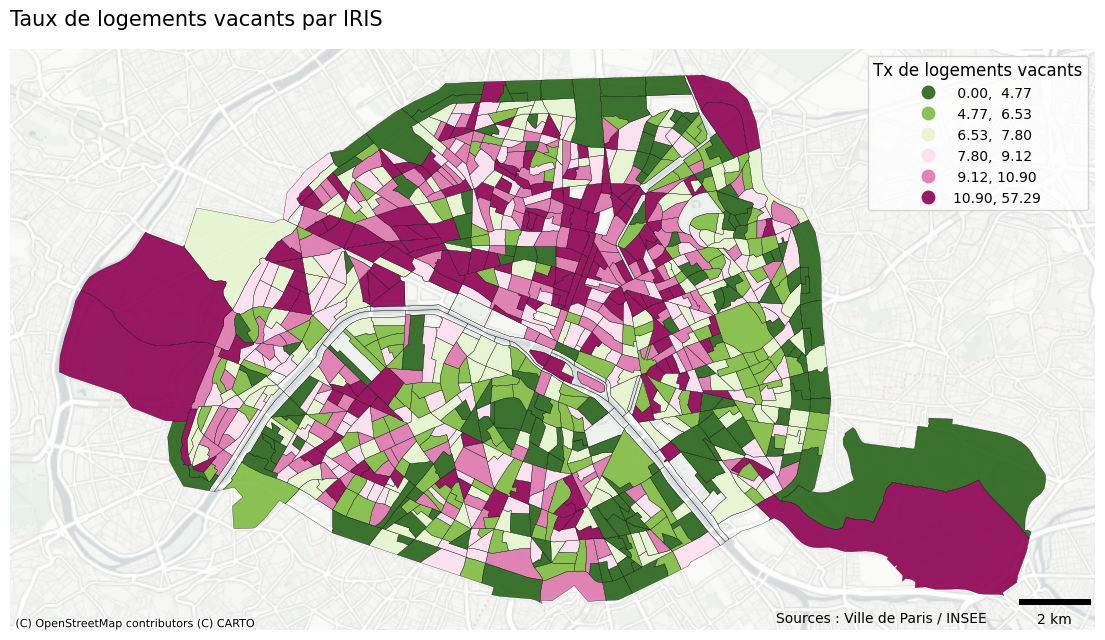

In [ ]:
#Faire une carte du taux de logements vacants par IRIS

Carte4, ax = plt.subplots(figsize=(14,14))

IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
IRISPARIS.to_crs('EPSG:3857').plot(ax=ax, k=6, column='txlogvac', cmap='PiYG_r',scheme='quantiles', alpha=0.9,
                                    legend=True, legend_kwds={'title': "Tx de logements vacants", 'loc': 'upper right', 'title_fontsize':12, 'fontsize':10})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

ax.axis("off")
plt.title('Taux de logements vacants par IRIS', loc='left', fontsize=15)
ax.text(0.90, 0.01, 'Sources : Ville de Paris / INSEE', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="black"))

plt.show()

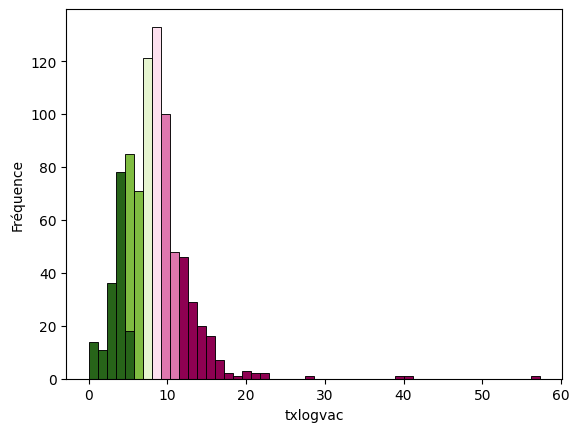

In [ ]:
# Histogramme en fonction de la discrétisation de la carte

import seaborn as sns

# Nombre de quantiles
num_quantiles = 6

# Calculer les quantiles
quantiles = pd.qcut(IRISPARIS['txlogvac'], num_quantiles, labels=False)

# Tracer l'histogramme avec des couleurs de quantiles en utilisant Seaborn
sns.histplot(data=IRISPARIS, x='txlogvac', bins=50, hue=quantiles, palette='PiYG_r',  alpha=1, legend=False)

# Définir les étiquettes des axes
plt.xlabel("txlogvac")
plt.ylabel("Fréquence")

# Afficher le graphe
plt.show()

In [ ]:
# Calculer le taux de logements sociaux par IRIS

IRISPARIS['Txlogsocial'] = IRISPARIS["nb_loc_social"] / IRISPARIS["nb_log"] *100
IRISPARIS.head(2)

iris_nom code_insee  iris_code  \
0            Gaillon 2      75102  751020502   
1  Faubourg du Roule 5      75108  751083005   

                                            geometry  \
0  POLYGON ((2.33366 48.86751, 2.33028 48.86832, ...   
1  POLYGON ((2.30564 48.8749, 2.30594 48.87481, 2...   

                        concat ardt  Code_IRIS              Libelle  \
0            75102 - Gaillon 2   02  751020502            Gaillon 2   
1  75108 - Faubourg du Roule 5   08  751083005  Faubourg du Roule 5   

    Population       c_ir                 l_ir       nb_log   nb_logvac  \
0   275.150423  751020502            Gaillon 2   270.874389   14.570355   
1  1378.912929  751083005  Faubourg du Roule 5  1350.500132  155.747158   

   nb_loc_social   txlogvac  Txlogsocial  
0       0.000000   5.379008     0.000000  
1      84.508682  11.532554     6.257584

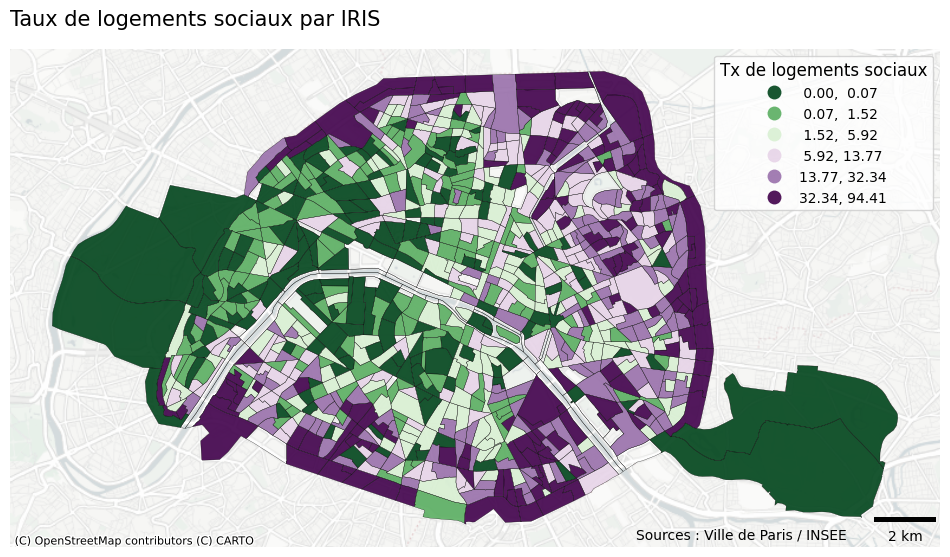

In [ ]:
#Faire une carte du taux de logements sociaux par IRIS

Carte4, ax = plt.subplots(figsize=(12,12))

IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
IRISPARIS.to_crs('EPSG:3857').plot(ax=ax, k=6, column='Txlogsocial', cmap='PRGn_r',scheme='quantiles', alpha=0.9,
                                  legend=True, legend_kwds={'title': "Tx de logements sociaux", 'loc': 'upper right', 'title_fontsize':12, 'fontsize':10})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

ax.axis("off")
plt.title('Taux de logements sociaux par IRIS', loc='left', fontsize=15)
ax.text(0.90, 0.01, 'Sources : Ville de Paris / INSEE', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="black"))

plt.show()

In [ ]:
# Histogramme en fonction de la discrétisation de la carte

import seaborn as sns

# Nombre de quantiles
num_quantiles = 6

# Calculer les quantiles
quantiles = pd.qcut(IRISPARIS['Txlogsocial'], num_quantiles, labels=False)

# Tracer l'histogramme avec des couleurs de quantiles en utilisant Seaborn
sns.histplot(data=IRISPARIS, x='Txlogsocial', bins=50, hue=quantiles, palette='PRGn_r',  alpha=1, legend=False)

# Définir les étiquettes des axes
plt.xlabel("Txlogsocial")
plt.ylabel("Fréquence")

# Afficher le graphe
plt.show()

<ipython-input-76-9060e0a09868>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  IRIScentro.geometry = IRIScentro['geometry'].centroid


NameError: name 'ARDT' is not defined

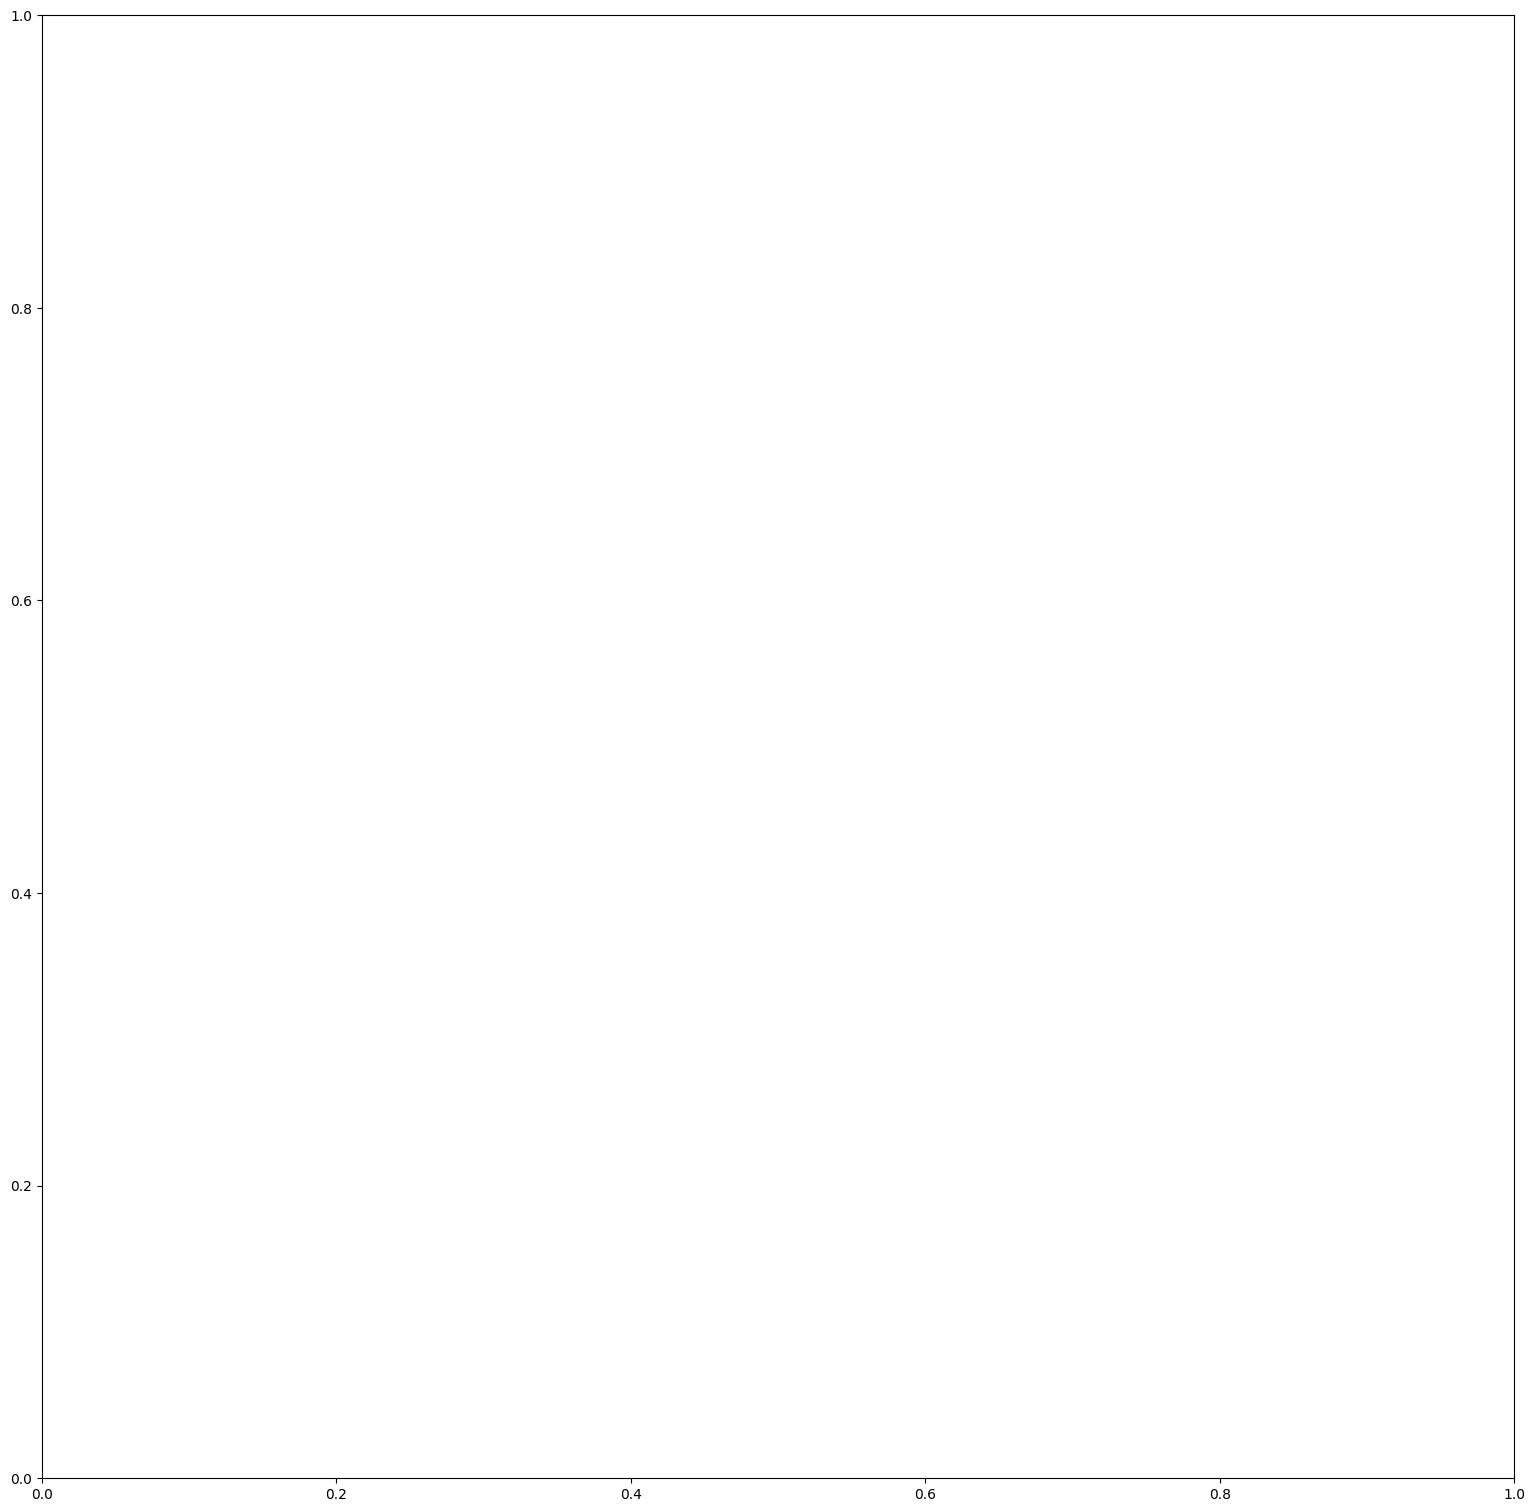

In [ ]:
# Faire une carte du nombre de logements sociaux par IRIS


## Commencer par créer un geodataframe sous forme de points
IRIScentro = IRISPARIS.copy()
IRIScentro.geometry = IRIScentro['geometry'].centroid


## Faire la carte

Carte5, ax = plt.subplots(figsize=(19,19))
ARDT.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.4, color = 'black')
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'grey')
IRIScentro.to_crs('EPSG:3857').plot(ax=ax, markersize="nb_loc_social", alpha=0.7, column="Txlogsocial", cmap='PRGn_r',scheme='quantiles', categorical=False,
                                    legend=True, legend_kwds={'title': "Tx de logements sociaux", 'loc': 'upper right', 'title_fontsize':15, 'fontsize':13})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.axis("off")
plt.title('Nombre et taux de logements sociaux par IRIS / INSEE - 2016', loc='left', fontsize=15)
ax.text(0.90, 0.01, 'Sources : Ville de Paris / INSEE', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=10)
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))

plt.show()

# Exercices en autonomie


## Faire la carte du tx de locataire par IRIS

pct_prop = pourcentage de propriétaire

## Faire une planche avec trois cartes

Exemples : https://coderzcolumn.com/tutorials/data-science/plotting-static-maps-with-geopandas-working-with-geospatial-data#4



